In [1]:
#librerias
import numpy as np
import pandas as pd
import seaborn as sns

# Cargando datos

In [2]:
# carga de datos
data1 = pd.read_csv("./data/train_1.csv",sep=";",index_col=None,header=0)
data2 = pd.read_csv("./data/train_2.csv",sep=";",index_col=None,header=0)
salida = pd.read_csv("./data/train_3.csv",sep=";",index_col=None,header=0)

#uniendo la data
data = data1.merge(data2,how='inner',on=['NUMPERIODO', 'NUMCODCONTRATOBSCS', 'VCHTELEFONO'])
data = data.merge(salida,how='inner',on=['NUMPERIODO', 'NUMCODCONTRATOBSCS', 'VCHTELEFONO'])

In [3]:
df = data.copy()

In [4]:
columns_exec = []
columns_exec.append('NUMINGRESOTEORICO')
columns_exec.append('VCHFAMILIA_PLAN')
columns_exec.append('NUMPERIODO')
columns_exec.append('VCHTELEFONO')
columns_exec.append('ANT_CLIENTE')
columns_exec.append('FLG_RECARGA')
columns_exec.append('VCHPACKCHIP')
columns_exec.append('VCHRANGO_RENTA')


In [5]:
pd.DataFrame(df.dtypes[df.dtypes=='object'])

,0
VCHPACKCHIP,object
VCHRANGO_RENTA,object
VCHFAMILIA_PLAN,object


In [6]:
df['VCHPACKCHIP'].value_counts()

PACK    510
SIM     239
Name: VCHPACKCHIP, dtype: int64

In [7]:
# VCHPACKCHIP
dicc_VCHPACKCHIP = {'PACK':0,
                   'SIM':0}
df['VCHPACKCHIP'] = df['VCHPACKCHIP'].map(dicc_VCHPACKCHIP)

In [8]:
# VCHRANGO_RENTA
df_VCHRANGO_RENTA_dummies = pd.get_dummies(df['VCHRANGO_RENTA'],prefix='VCHRANGO_RENTA')

In [9]:
df = pd.concat([df,df_VCHRANGO_RENTA_dummies],axis=1)

In [10]:
df.head()

,NUMPERIODO,NUMCODCONTRATOBSCS,VCHTELEFONO,ANT_CLIENTE,NUMRENTABASICA,VCHPACKCHIP,NUMINGRESOTEORICO,NUMMINUTOSENTRANTE_2M,NUMMINUTOSALIENTE_2M,NUMMINSALIENTEOFFNET_2M,...,PCT_MB_ADICIONAL,PCT_USO_TRAFICOTOTAL_2M,PCT_USO_TRAFICOTOTAL_1M,PCT_USO_TRAFICOTOTAL_M0,PCT_USO_TRAFICOTOTAL_U3M,PCT_USO_TRAFICOTOTAL_U2M,FLG_RECARGA,VCHRANGO_RENTA_Alta,VCHRANGO_RENTA_Baja,VCHRANGO_RENTA_Media
0,201804,38172100,51982603192,7.645161,41.525398,0,41.5254,151,596,590.9832,...,0,0.0,0.0,0.0,0.0,0.0,0,0,1,0
1,201804,9028333,51983661925,45.903226,122.879997,0,92.3700,54,410,327.9664,...,0,0.0,0.0,0.0,0.0,0.0,0,1,0,0
2,201805,34979663,51942976545,11.612903,66.949203,0,NaN,792,587,512.2667,...,0,0.0,0.0,0.0,0.0,0.0,0,0,0,1
3,201805,13670934,51958993810,32.838710,41.525398,0,NaN,170,144,100.5000,...,0,0.0,0.0,0.0,0.0,0.0,0,0,1,0
4,201804,16547229,51934098463,28.387097,62.711899,0,62.7119,219,784,745.2162,...,0,0.0,0.0,0.0,0.0,0.0,1,0,0,1


In [11]:
x_data = df.drop(columns=columns_exec)

In [12]:
x_data.head()

,NUMCODCONTRATOBSCS,NUMRENTABASICA,NUMMINUTOSENTRANTE_2M,NUMMINUTOSALIENTE_2M,NUMMINSALIENTEOFFNET_2M,NUMMINENTRANTEOFFNET_2M,NUMMINSALIENTEONNET_2M,NUMMINENTRANTEONNET_2M,NUMTRAFICOFACEBOOK_2M,NUMTRAFICOWHATSAPP_2M,...,NUMKB_ADICIONAL,PCT_MB_ADICIONAL,PCT_USO_TRAFICOTOTAL_2M,PCT_USO_TRAFICOTOTAL_1M,PCT_USO_TRAFICOTOTAL_M0,PCT_USO_TRAFICOTOTAL_U3M,PCT_USO_TRAFICOTOTAL_U2M,VCHRANGO_RENTA_Alta,VCHRANGO_RENTA_Baja,VCHRANGO_RENTA_Media
0,38172100,41.525398,151,596,590.9832,155.5999,5.0168,0.0000,52.437877,291.387089,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0,1,0
1,9028333,122.879997,54,410,327.9664,14.1669,82.0336,39.8331,33.883530,106.631694,...,0.0,0,0.0,0.0,0.0,0.0,0.0,1,0,0
2,34979663,66.949203,792,587,512.2667,657.4498,74.7333,134.5502,106.086946,366.092574,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,1
3,13670934,41.525398,170,144,100.5000,122.3668,43.5000,47.6332,47.410069,739.959649,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0,1,0
4,16547229,62.711899,219,784,745.2162,193.3838,38.7838,25.6162,237.011286,1114.929423,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,1


In [13]:
y_data = df['FLG_RECARGA']

In [14]:
from sklearn.cross_validation import train_test_split

C:\Users\mmejia\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [245]:
X_train, X_test, y_train, y_test = train_test_split(x_data,y_data,train_size=0.6,random_state=50)

In [246]:
X_train.reset_index(inplace=True,drop=True)
X_test.reset_index(inplace=True,drop=True)
y_train.reset_index(inplace=True,drop=True)
y_test.reset_index(inplace=True,drop=True)

# Scaling

In [247]:
X_train.head()

,NUMCODCONTRATOBSCS,NUMRENTABASICA,NUMMINUTOSENTRANTE_2M,NUMMINUTOSALIENTE_2M,NUMMINSALIENTEOFFNET_2M,NUMMINENTRANTEOFFNET_2M,NUMMINSALIENTEONNET_2M,NUMMINENTRANTEONNET_2M,NUMTRAFICOFACEBOOK_2M,NUMTRAFICOWHATSAPP_2M,...,NUMKB_ADICIONAL,PCT_MB_ADICIONAL,PCT_USO_TRAFICOTOTAL_2M,PCT_USO_TRAFICOTOTAL_1M,PCT_USO_TRAFICOTOTAL_M0,PCT_USO_TRAFICOTOTAL_U3M,PCT_USO_TRAFICOTOTAL_U2M,VCHRANGO_RENTA_Alta,VCHRANGO_RENTA_Baja,VCHRANGO_RENTA_Media
0,39309279,38.135601,48,59,58.8331,44.7000,0.1669,3.3000,843.076318,627.968464,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0,1,0
1,26844455,29.660999,239,168,106.3170,178.3997,61.6830,60.6003,84.157905,104.282163,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0,1,0
2,41364966,109.321999,211,153,129.0500,196.5998,23.9500,14.4002,36.987111,1729.155943,...,0.0,0,0.0,0.0,0.0,0.0,0.0,1,0,0
3,33229405,75.423698,704,650,489.1998,520.3665,160.8002,183.6335,429.282798,732.092386,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,1
4,10413380,66.949203,177,156,135.6499,132.7000,20.3501,44.3000,10.628861,215.430846,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,1


In [248]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [249]:
X_train_scaler = scaler.transform(X_train)
X_train_scaler = pd.DataFrame(X_train_scaler, columns = X_train.columns)
X_train_scaler.head(3)

,NUMCODCONTRATOBSCS,NUMRENTABASICA,NUMMINUTOSENTRANTE_2M,NUMMINUTOSALIENTE_2M,NUMMINSALIENTEOFFNET_2M,NUMMINENTRANTEOFFNET_2M,NUMMINSALIENTEONNET_2M,NUMMINENTRANTEONNET_2M,NUMTRAFICOFACEBOOK_2M,NUMTRAFICOWHATSAPP_2M,...,NUMKB_ADICIONAL,PCT_MB_ADICIONAL,PCT_USO_TRAFICOTOTAL_2M,PCT_USO_TRAFICOTOTAL_1M,PCT_USO_TRAFICOTOTAL_M0,PCT_USO_TRAFICOTOTAL_U3M,PCT_USO_TRAFICOTOTAL_U2M,VCHRANGO_RENTA_Alta,VCHRANGO_RENTA_Baja,VCHRANGO_RENTA_Media
0,1.036144,-1.092367,-0.987566,-1.058589,-0.914572,-0.865046,-0.722390,-0.686704,1.073023,-0.062033,...,-0.500696,0.0,-0.353366,-0.354518,-0.387578,-0.379639,-0.372748,-0.242821,1.418951,-1.257163
1,-0.065617,-1.440791,-0.409404,-0.792629,-0.748969,-0.203059,-0.463495,-0.427260,-0.193784,-0.560091,...,-0.500696,0.0,-0.353366,-0.354518,-0.387578,-0.379639,-0.372748,-0.242821,1.418951,-1.257163
2,1.217845,1.834378,-0.494161,-0.829229,-0.669686,-0.112945,-0.622297,-0.636445,-0.272523,0.985266,...,-0.500696,0.0,-0.353366,-0.354518,-0.387578,-0.379639,-0.372748,4.118252,-0.704746,-1.257163


In [250]:
X_test_scaler = scaler.transform(X_test)
X_test_scaler = pd.DataFrame(X_test_scaler, columns = X_test.columns)
X_test_scaler.head(3)

,NUMCODCONTRATOBSCS,NUMRENTABASICA,NUMMINUTOSENTRANTE_2M,NUMMINUTOSALIENTE_2M,NUMMINSALIENTEOFFNET_2M,NUMMINENTRANTEOFFNET_2M,NUMMINSALIENTEONNET_2M,NUMMINENTRANTEONNET_2M,NUMTRAFICOFACEBOOK_2M,NUMTRAFICOWHATSAPP_2M,...,NUMKB_ADICIONAL,PCT_MB_ADICIONAL,PCT_USO_TRAFICOTOTAL_2M,PCT_USO_TRAFICOTOTAL_1M,PCT_USO_TRAFICOTOTAL_M0,PCT_USO_TRAFICOTOTAL_U3M,PCT_USO_TRAFICOTOTAL_U2M,VCHRANGO_RENTA_Alta,VCHRANGO_RENTA_Baja,VCHRANGO_RENTA_Media
0,-1.626632,-0.953000,-0.706053,-0.063070,-0.196828,-0.458873,0.128581,-0.637051,-0.331470,-0.655343,...,-0.500696,0.0,-0.353366,-0.354518,-0.387578,-0.379639,-0.372748,-0.242821,1.418951,-1.257163
1,0.877330,1.137536,-0.479026,-0.680389,-0.527334,-0.149252,-0.537354,-0.580605,-0.264347,-0.539988,...,-0.500696,0.0,-0.353366,-0.354518,-0.387578,-0.379639,-0.372748,-0.242821,-0.704746,0.795442
2,0.646218,0.440689,0.084002,-0.026470,-0.644110,0.398687,0.731458,-0.239507,-0.314048,-0.569602,...,-0.500696,0.0,-0.353366,-0.354518,-0.387578,-0.379639,-0.372748,-0.242821,-0.704746,0.795442


In [251]:
X_train = X_train_scaler.copy()
X_test = X_test_scaler.copy()

In [252]:
print(X_train.shape)
print(X_test.shape)

(449, 352)
(300, 352)


## Modelamiento

In [253]:
def print_mc(matriz_conf):
    matriz_conf = pd.DataFrame(matriz_conf)
    matriz_conf.index = ["Real_0","Real_1"]
    matriz_conf.columns = ["Pred_0","Pred_1"]
    print(matriz_conf)

In [254]:
################################## CURVA ROC ###############################
def graficar_roc(y_test,y_pred_proba):
    import matplotlib.pyplot as plt
    from sklearn import metrics as mt
    from sklearn.cross_validation import train_test_split

    fpr, tpr, thresholds  = mt.roc_curve(y_test.astype('int'),y_pred_proba[:,1], pos_label = 1)

    roc_auc = mt.auc(fpr, tpr)

    print ('ROC AUC: %0.4f' % roc_auc)
    gini_print = (2*roc_auc - 1)

    # Plot of a ROC curve for a specific class
    plt.figure(figsize=(8,6))
    plt.plot(fpr, tpr, label='ROC curve (area = %0.4f) \nGini (2*roc_auc - 1) = %0.4f' %(roc_auc,gini_print))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

In [255]:
# modelo
from sklearn.linear_model import LogisticRegression

In [256]:
# Crear objeto modelo (Instanciar)
model_regl = LogisticRegression()

In [257]:
# Entrenar (ajustar) el modelo:
model = model_regl.fit(X_train,y_train)

In [258]:
# Generar las predicciones:
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

# Generar las probabilidades
pred_proba_train = model.predict_proba(X_train)
pred_proba_test = model.predict_proba(X_test)

In [259]:
X_test.head()

,NUMCODCONTRATOBSCS,NUMRENTABASICA,NUMMINUTOSENTRANTE_2M,NUMMINUTOSALIENTE_2M,NUMMINSALIENTEOFFNET_2M,NUMMINENTRANTEOFFNET_2M,NUMMINSALIENTEONNET_2M,NUMMINENTRANTEONNET_2M,NUMTRAFICOFACEBOOK_2M,NUMTRAFICOWHATSAPP_2M,...,NUMKB_ADICIONAL,PCT_MB_ADICIONAL,PCT_USO_TRAFICOTOTAL_2M,PCT_USO_TRAFICOTOTAL_1M,PCT_USO_TRAFICOTOTAL_M0,PCT_USO_TRAFICOTOTAL_U3M,PCT_USO_TRAFICOTOTAL_U2M,VCHRANGO_RENTA_Alta,VCHRANGO_RENTA_Baja,VCHRANGO_RENTA_Media
0,-1.626632,-0.953000,-0.706053,-0.063070,-0.196828,-0.458873,0.128581,-0.637051,-0.331470,-0.655343,...,-0.500696,0.0,-0.353366,-0.354518,-0.387578,-0.379639,-0.372748,-0.242821,1.418951,-1.257163
1,0.877330,1.137536,-0.479026,-0.680389,-0.527334,-0.149252,-0.537354,-0.580605,-0.264347,-0.539988,...,-0.500696,0.0,-0.353366,-0.354518,-0.387578,-0.379639,-0.372748,-0.242821,-0.704746,0.795442
2,0.646218,0.440689,0.084002,-0.026470,-0.644110,0.398687,0.731458,-0.239507,-0.314048,-0.569602,...,-0.500696,0.0,-0.353366,-0.354518,-0.387578,-0.379639,-0.372748,-0.242821,-0.704746,0.795442
3,0.455389,0.998168,0.256542,0.481049,0.313928,0.457857,0.450745,-0.035532,0.077569,-0.185436,...,1.997220,0.0,0.662460,1.034131,0.808124,1.095453,1.211099,-0.242821,-0.704746,0.795442
4,0.175767,0.440689,-0.100647,-0.182630,-0.424566,-0.193901,0.197179,0.026199,-0.296576,0.396728,...,-0.500696,0.0,-0.353366,-0.354518,-0.387578,-0.379639,-0.372748,-0.242821,-0.704746,0.795442


In [260]:
from sklearn import metrics as mt

In [261]:
# Sobre el Training Data
print("Metricas del Training...")

Metricas del Training...


In [262]:
matriz_conf = mt.confusion_matrix(y_train,pred_train)
print_mc(matriz_conf)

        Pred_0  Pred_1
Real_0     197      21
Real_1      28     203


In [263]:
accuracy_train = mt.accuracy_score(y_train,pred_train)
print("Accuracy - Train:", accuracy_train) # 0.8775055679287305

Accuracy - Train: 0.89086859688196


In [264]:
print(mt.classification_report(y_train,pred_train,digits = 3))

             precision    recall  f1-score   support

          0      0.876     0.904     0.889       218
          1      0.906     0.879     0.892       231

avg / total      0.891     0.891     0.891       449



ROC AUC: 0.9563


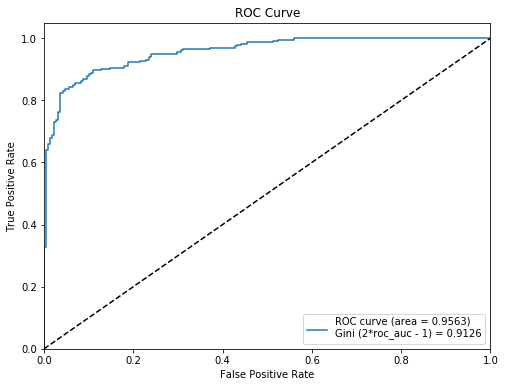

In [265]:
graficar_roc(y_train,pred_proba_train) # 0.9534

In [266]:
# Sobre el testing Data
print("Metricas del testing...")

Metricas del testing...


In [267]:
matriz_conf = mt.confusion_matrix(y_test,pred_test)
print_mc(matriz_conf)

        Pred_0  Pred_1
Real_0     118      29
Real_1      35     118


In [268]:
accuracy_test = mt.accuracy_score(y_test,pred_test)
print("Accuracy - test:", accuracy_test) # 0.8233333333333334

Accuracy - test: 0.7866666666666666


In [269]:
print(mt.classification_report(y_test,pred_test,digits = 3))

             precision    recall  f1-score   support

          0      0.771     0.803     0.787       147
          1      0.803     0.771     0.787       153

avg / total      0.787     0.787     0.787       300



ROC AUC: 0.8544


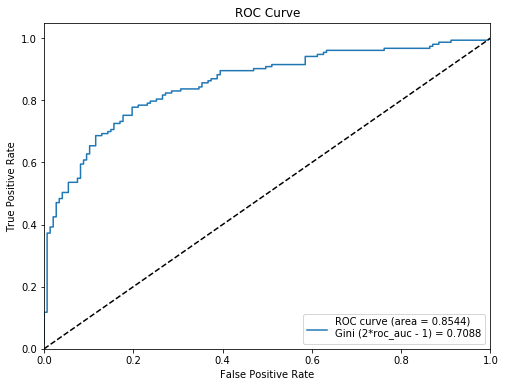

In [270]:
graficar_roc(y_test,pred_proba_test) # 0.8731

## Cross_Validation

In [271]:
import matplotlib.pyplot as plt

In [272]:
X_train_cv = X_train.copy()
y_train_cv = y_train.copy()
print(X_train_cv.shape)
print(y_train_cv.shape)
print(y_test.shape)
print(df.shape)

(449, 352)
(449,)
(300,)
(749, 360)


In [273]:
# Instanciar Modelo Base:
#from sklearn.ensemble import RandomForestClassifier
#model_rf = RandomForestClassifier(max_depth=5, n_estimators= 50, 
#                                  random_state=100, max_features = 5)

In [274]:
# croos Validation
from sklearn.base import clone
from sklearn import cross_validation
from sklearn.metrics import roc_auc_score
k=20 #n_folds
metric = 'roc_auc'

cv = cross_validation.KFold(len(X_train_cv), n_folds=k, random_state = 121, shuffle = True)

results_train = []
results_test = []
list_models = [] 

Ok -  1 :  0.960018 0.742424
Ok -  2 :  0.968588 0.787879
Ok -  3 :  0.95392 0.983333
Ok -  4 :  0.955776 0.933333
Ok -  5 :  0.957633 0.776786
Ok -  6 :  0.956952 0.828947
Ok -  7 :  0.955297 0.946154
Ok -  8 :  0.958694 0.8
Ok -  9 :  0.957911 0.901515
Ok -  10 :  0.956851 0.884298
Ok -  11 :  0.95549 0.942149
Ok -  12 :  0.957223 0.9375
Ok -  13 :  0.960015 0.767857
Ok -  14 :  0.955621 0.794872
Ok -  15 :  0.955153 0.948718
Ok -  16 :  0.958256 0.801653
Ok -  17 :  0.957971 0.909091
Ok -  18 :  0.960075 0.803419
Ok -  19 :  0.955678 0.809524
Ok -  20 :  0.961363 0.741667
max CV roc - train 0.9685880043235613
min CV roc - train 0.953919901036029
max CV roc - test 0.9833333333333334
min CV roc - test 0.7416666666666666
Desviacion estandar - train:  0.0031129037345106947
Desviacion estandar - test:  0.07697446939629057
CV roc - train : 0.9579243041425686
CV roc - test  : 0.8520559013023128


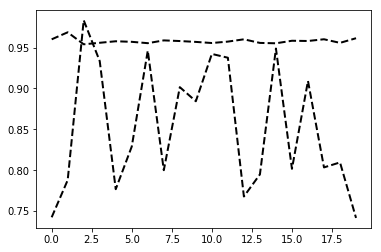

In [275]:
i = 1
for traincv, testcv in cv:
    model = clone(model_regl)
    # Entrenar el modelo
    model = model.fit(X_train_cv.values[traincv], y_train_cv[traincv])
    # Calcular probabilidades
    probas_train = model.predict_proba(X_train_cv.values[traincv])[:,1]
    probas_test = model.predict_proba(X_train_cv.values[testcv])[:,1]
    # Calcular indicadores
    metric_train = roc_auc_score(y_train_cv[traincv],probas_train)
    metric_test = roc_auc_score(y_train_cv[testcv],probas_test)
    # Almacenar metricas y modelos
    results_train.append(metric_train)
    results_test.append(metric_test)
    list_models.append(model)
    
    print("Ok - ",str(i),": ", str(round(metric_train,6)), str(round(metric_test,6)))
    #print("Mean Target: ", str(round(y_train_cv[traincv].mean(),4)), str(round(y_train_cv[testcv].mean(),4)))

    i = i + 1

print("max CV roc - train",np.max(results_train))
print("min CV roc - train",np.min(results_train))
print("max CV roc - test",np.max(results_test))
print("min CV roc - test",np.min(results_test))
print("Desviacion estandar - train: ",np.std(results_train))
print("Desviacion estandar - test: ",np.std(results_test))

plt.plot(range(len(results_train)),results_train, 'k--', linewidth = 2)
plt.plot(range(len(results_test)),results_test, 'k--', linewidth = 2)



result_final_train = np.mean(results_train)
result_final_test = np.mean(results_test)

print("CV roc - train :",result_final_train)
print("CV roc - test  :",result_final_test)

#### Calcular las predicciones sobre el X_test ..

In [276]:
df_probas_subm = pd.DataFrame()
i = 1
for model in list_models:
    probas_tmp = model.predict_proba(X_test)[:,1]
    df_probas_subm["model"+str(i)] = probas_tmp
    i += 1

In [277]:
df_probas_subm.head()

,model1,model2,model3,model4,model5,model6,model7,model8,model9,model10,model11,model12,model13,model14,model15,model16,model17,model18,model19,model20
0,0.127022,0.090712,0.093080,0.110433,0.139096,0.118722,0.079677,0.062961,0.111864,0.082696,0.104081,0.143913,0.117070,0.083605,0.067392,0.142630,0.087329,0.098435,0.119531,0.094703
1,0.952694,0.990982,0.885645,0.907850,0.932149,0.934315,0.903936,0.923985,0.945293,0.934644,0.933343,0.939391,0.952478,0.920482,0.924315,0.886039,0.914402,0.954965,0.910084,0.902269
2,1.000000,1.000000,1.000000,1.000000,1.000000,0.999999,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
3,0.602998,0.528266,0.638818,0.701043,0.591023,0.630081,0.635731,0.653333,0.725295,0.650621,0.678045,0.619518,0.583500,0.681531,0.682889,0.625877,0.705842,0.653327,0.676031,0.792202
4,0.995347,0.998485,0.996017,0.995065,0.995714,0.992908,0.995354,0.997762,0.997086,0.995789,0.996239,0.998948,0.995822,0.995474,0.996327,0.994807,0.993826,0.995931,0.993663,0.998620


In [278]:
y_probas_subm = df_probas_subm.apply(np.mean, axis = 1)
y_probas_subm

0      1.037477e-01
1      9.274631e-01
2      1.000000e+00
3      6.527984e-01
4      9.959592e-01
5      1.606971e-01
6      1.984553e-01
7      1.209255e-01
8      9.999729e-01
9      1.795510e-04
10     1.751814e-02
11     9.945190e-01
12     2.001781e-01
13     9.566022e-01
14     5.383998e-06
15     9.951012e-01
16     1.976822e-01
17     3.355428e-01
18     1.727136e-02
19     9.510764e-01
20     9.999953e-01
21     8.614465e-01
22     1.000000e+00
23     3.611759e-10
24     9.998568e-01
25     1.530608e-01
26     5.255660e-01
27     9.836048e-01
28     4.863675e-01
29     1.509764e-01
           ...     
270    7.729036e-02
271    2.966912e-01
272    9.164519e-01
273    6.723476e-01
274    9.990060e-01
275    1.100883e-01
276    1.000000e+00
277    7.156418e-01
278    9.796186e-01
279    5.268245e-02
280    7.294102e-01
281    9.125760e-01
282    9.244781e-01
283    9.999604e-01
284    5.571148e-01
285    6.862016e-02
286    7.416218e-02
287    2.117508e-01
288    6.388789e-03


In [279]:
roc_auc_score(y_test,y_probas_subm)

0.8560090702947848

# PROBANDO CON DATA TEST - PREDICCION

In [280]:
# Modelo implementado
model_regl

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

        Pred_0  Pred_1
Real_0     311      54
Real_1      57     327
Accuracy - Test: 0.8518024032042724
             precision    recall  f1-score   support

          0    0.84511   0.85205   0.84857       365
          1    0.85827   0.85156   0.85490       384

avg / total    0.85186   0.85180   0.85182       749

ROC AUC: 0.9169


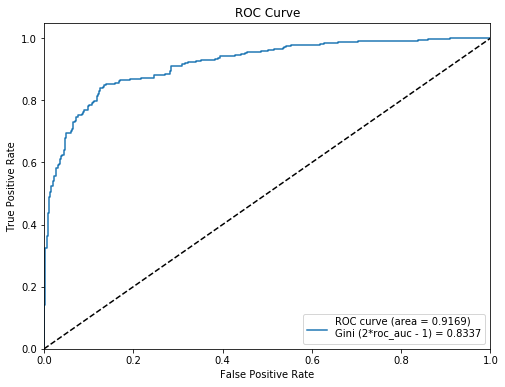

In [281]:
# cargamos la data
# carga de datos
data1 = pd.read_csv("./data/train_1.csv",sep=";",index_col=None,header=0)
data2 = pd.read_csv("./data/train_2.csv",sep=";",index_col=None,header=0)
salida = pd.read_csv("./data/train_3.csv",sep=";",index_col=None,header=0)

#uniendo la data
data = data1.merge(data2,how='inner',on=['NUMPERIODO', 'NUMCODCONTRATOBSCS', 'VCHTELEFONO'])
data = data.merge(salida,how='inner',on=['NUMPERIODO', 'NUMCODCONTRATOBSCS', 'VCHTELEFONO'])


# si la data de test ya esta junta reemplar
#data = pd.read_csv("./data/test.csv",sep=";",index_col=None,header=0)


df = data.copy()


## Se excluyen las columnas.
columns_exec = []
columns_exec.append('NUMINGRESOTEORICO')
columns_exec.append('VCHFAMILIA_PLAN')
columns_exec.append('NUMPERIODO')
columns_exec.append('VCHTELEFONO')
columns_exec.append('ANT_CLIENTE')
columns_exec.append('FLG_RECARGA')
columns_exec.append('VCHPACKCHIP')
columns_exec.append('VCHRANGO_RENTA')

###### transformando dummys ########

# VCHPACKCHIP
dicc_VCHPACKCHIP = {'PACK':0,'SIM':0}
df['VCHPACKCHIP'] = df['VCHPACKCHIP'].map(dicc_VCHPACKCHIP)

# VCHRANGO_RENTA
df_VCHRANGO_RENTA_dummies = pd.get_dummies(df['VCHRANGO_RENTA'],prefix='VCHRANGO_RENTA')

df = pd.concat([df,df_VCHRANGO_RENTA_dummies],axis=1)

##################### Fin dummys ####################

x_data = df.drop(columns=columns_exec)
y_data = df['FLG_RECARGA']

############ ESCALANDO LA DATA

scaler = StandardScaler()
scaler.fit(x_data)

X_test_scaler = scaler.transform(x_data)
X_test_scaler = pd.DataFrame(X_test_scaler, columns = X_test.columns)

X_test = X_test_scaler.copy()

#################

# Generar las predicciones:
pred_test = model_regl.predict(X_test)

# Generar las probabilidades
pred_proba_test = model_regl.predict_proba(X_test)
X_test_scaler = scaler.transform(X_test)
X_test_scaler = pd.DataFrame(X_test_scaler, columns = X_test.columns)
X_test_scaler.head(3)

#####################################################################
matriz_conf = mt.confusion_matrix(y_data,pred_test)
print_mc(matriz_conf)

accuracy_test = mt.accuracy_score(y_data,pred_test)
print("Accuracy - Test:", accuracy_test) # 0.8775055679287305

print(mt.classification_report(y_data,pred_test,digits = 5))

graficar_roc(y_data,pred_proba_test) # 0.9534

In [244]:
df.head()

,NUMPERIODO,NUMCODCONTRATOBSCS,VCHTELEFONO,ANT_CLIENTE,NUMRENTABASICA,VCHPACKCHIP,NUMINGRESOTEORICO,NUMMINUTOSENTRANTE_2M,NUMMINUTOSALIENTE_2M,NUMMINSALIENTEOFFNET_2M,...,PCT_MB_ADICIONAL,PCT_USO_TRAFICOTOTAL_2M,PCT_USO_TRAFICOTOTAL_1M,PCT_USO_TRAFICOTOTAL_M0,PCT_USO_TRAFICOTOTAL_U3M,PCT_USO_TRAFICOTOTAL_U2M,FLG_RECARGA,VCHRANGO_RENTA_Alta,VCHRANGO_RENTA_Baja,VCHRANGO_RENTA_Media
0,201804,38172100,51982603192,7.645161,41.525398,0,41.5254,151,596,590.9832,...,0,0.0,0.0,0.0,0.0,0.0,0,0,1,0
1,201804,9028333,51983661925,45.903226,122.879997,0,92.3700,54,410,327.9664,...,0,0.0,0.0,0.0,0.0,0.0,0,1,0,0
2,201805,34979663,51942976545,11.612903,66.949203,0,NaN,792,587,512.2667,...,0,0.0,0.0,0.0,0.0,0.0,0,0,0,1
3,201805,13670934,51958993810,32.838710,41.525398,0,NaN,170,144,100.5000,...,0,0.0,0.0,0.0,0.0,0.0,0,0,1,0
4,201804,16547229,51934098463,28.387097,62.711899,0,62.7119,219,784,745.2162,...,0,0.0,0.0,0.0,0.0,0.0,1,0,0,1
